<a href="https://colab.research.google.com/github/Yeshvik/C17/blob/main/Lab2_'2403A51221_Batch10'.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Heart_Disease_Prediction.csv')
print(df.head())//prints the first 5 rows
print(df.tail())//prints the last 5 rows
print(df.shape)//prints the number of rows and columns
df.info()
print(df.columns)//prints the column names



   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0   

In [5]:
print('Statistical Summary of the DataFrame:')
display(df.describe())

print(f"Mean Age: {df['Age'].mean():.2f}")
print(f"Median Age: {df['Age'].median():.2f}")
print(f"Standard Deviation of Age: {df['Age'].std():.2f}")

print(f"Minimum Cholesterol: {df['Cholesterol'].min()}")
print(f"Maximum Cholesterol: {df['Cholesterol'].max()}")

Statistical Summary of the DataFrame:


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


Mean Age: 54.43
Median Age: 55.00
Standard Deviation of Age: 9.11
Minimum Cholesterol: 126
Maximum Cholesterol: 564


In [17]:
print(f"number of people with heart disease: {len(df[df['Heart Disease']=='Presence'])}")
print(f"number of people without heart disease: {len(df[df['Heart Disease']=='Absence'])}")




number of people with heart disease: 120
number of people without heart disease: 150


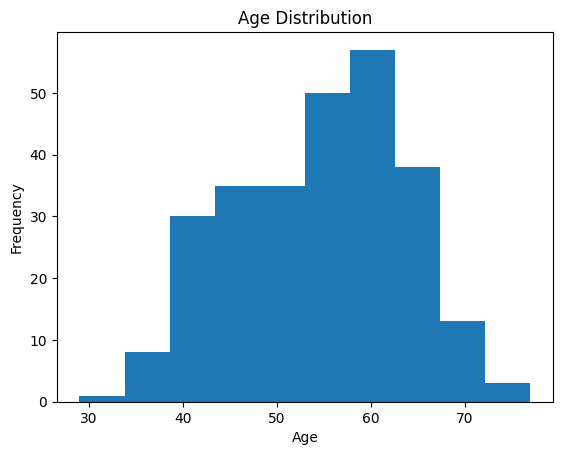

In [18]:
plt.hist(df['Age'], bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

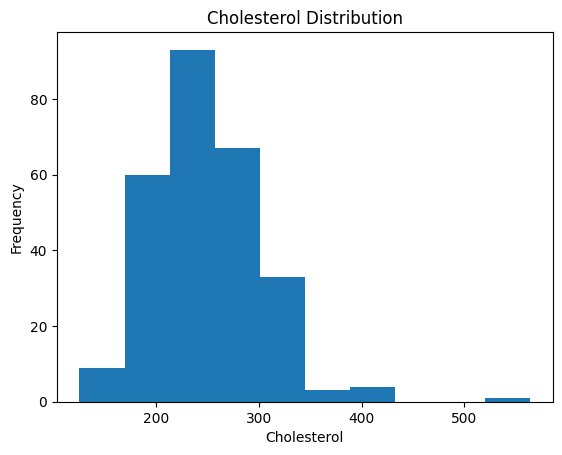

In [19]:
plt.hist(df['Cholesterol'], bins=10)
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

In [22]:
df['Heart Disease Encoded'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})
corr_matrix = df.drop('Heart Disease',axis = 1).corr()
print(corr_matrix)

                              Age       Sex  Chest pain type        BP  \
Age                      1.000000 -0.094401         0.096920  0.273053   
Sex                     -0.094401  1.000000         0.034636 -0.062693   
Chest pain type          0.096920  0.034636         1.000000 -0.043196   
BP                       0.273053 -0.062693        -0.043196  1.000000   
Cholesterol              0.220056 -0.201647         0.090465  0.173019   
FBS over 120             0.123458  0.042140        -0.098537  0.155681   
EKG results              0.128171  0.039253         0.074325  0.116157   
Max HR                  -0.402215 -0.076101        -0.317682 -0.039136   
Exercise angina          0.098297  0.180022         0.353160  0.082793   
ST depression            0.194234  0.097412         0.167244  0.222800   
Slope of ST              0.159774  0.050545         0.136900  0.142472   
Number of vessels fluro  0.356081  0.086830         0.225890  0.085697   
Thallium                 0.106100  0.3

In [26]:
#2.Identify highly correlated variables
hcv = corr_matrix[abs(corr_matrix) > 0.5]
print(hcv)

                         Age  Sex  Chest pain type   BP  Cholesterol  \
Age                      1.0  NaN              NaN  NaN          NaN   
Sex                      NaN  1.0              NaN  NaN          NaN   
Chest pain type          NaN  NaN              1.0  NaN          NaN   
BP                       NaN  NaN              NaN  1.0          NaN   
Cholesterol              NaN  NaN              NaN  NaN          1.0   
FBS over 120             NaN  NaN              NaN  NaN          NaN   
EKG results              NaN  NaN              NaN  NaN          NaN   
Max HR                   NaN  NaN              NaN  NaN          NaN   
Exercise angina          NaN  NaN              NaN  NaN          NaN   
ST depression            NaN  NaN              NaN  NaN          NaN   
Slope of ST              NaN  NaN              NaN  NaN          NaN   
Number of vessels fluro  NaN  NaN              NaN  NaN          NaN   
Thallium                 NaN  NaN              NaN  NaN         

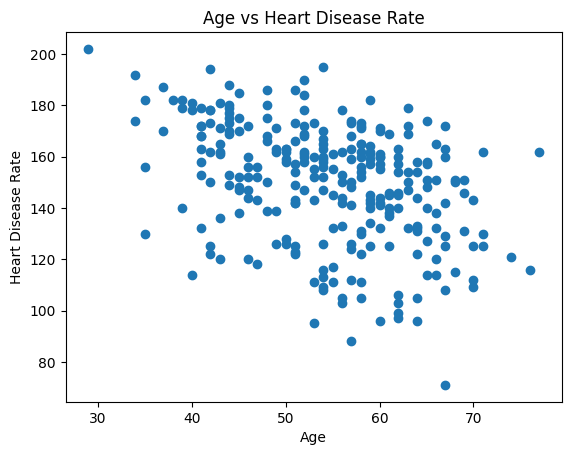

In [23]:
plt.scatter(df['Age'], df['Max HR'])
plt.title('Age vs Heart Disease Rate')
plt.xlabel('Age')
plt.ylabel('Heart Disease Rate')
plt.show()